In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [43]:
df = pd.read_csv("loan_sanction.csv")

In [44]:
df.shape

(614, 13)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
df.drop('Loan_ID', axis=1, inplace=True)

In [50]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [51]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [52]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [53]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [54]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [55]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [56]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [57]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [58]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [59]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.00,614.00,592.00,600.00
mean,5403.46,1621.25,146.41,342.00
std,6109.04,2926.25,85.59,65.12
min,150.00,0.00,9.00,12.00
25%,2877.50,0.00,100.00,360.00
50%,3812.50,1188.50,128.00,360.00
75%,5795.00,2297.25,168.00,360.00
max,81000.00,41667.00,700.00,480.00


In [60]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':2})
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Dependents'] = le.fit_transform(df['Dependents'])

<function matplotlib.pyplot.show(close=None, block=None)>

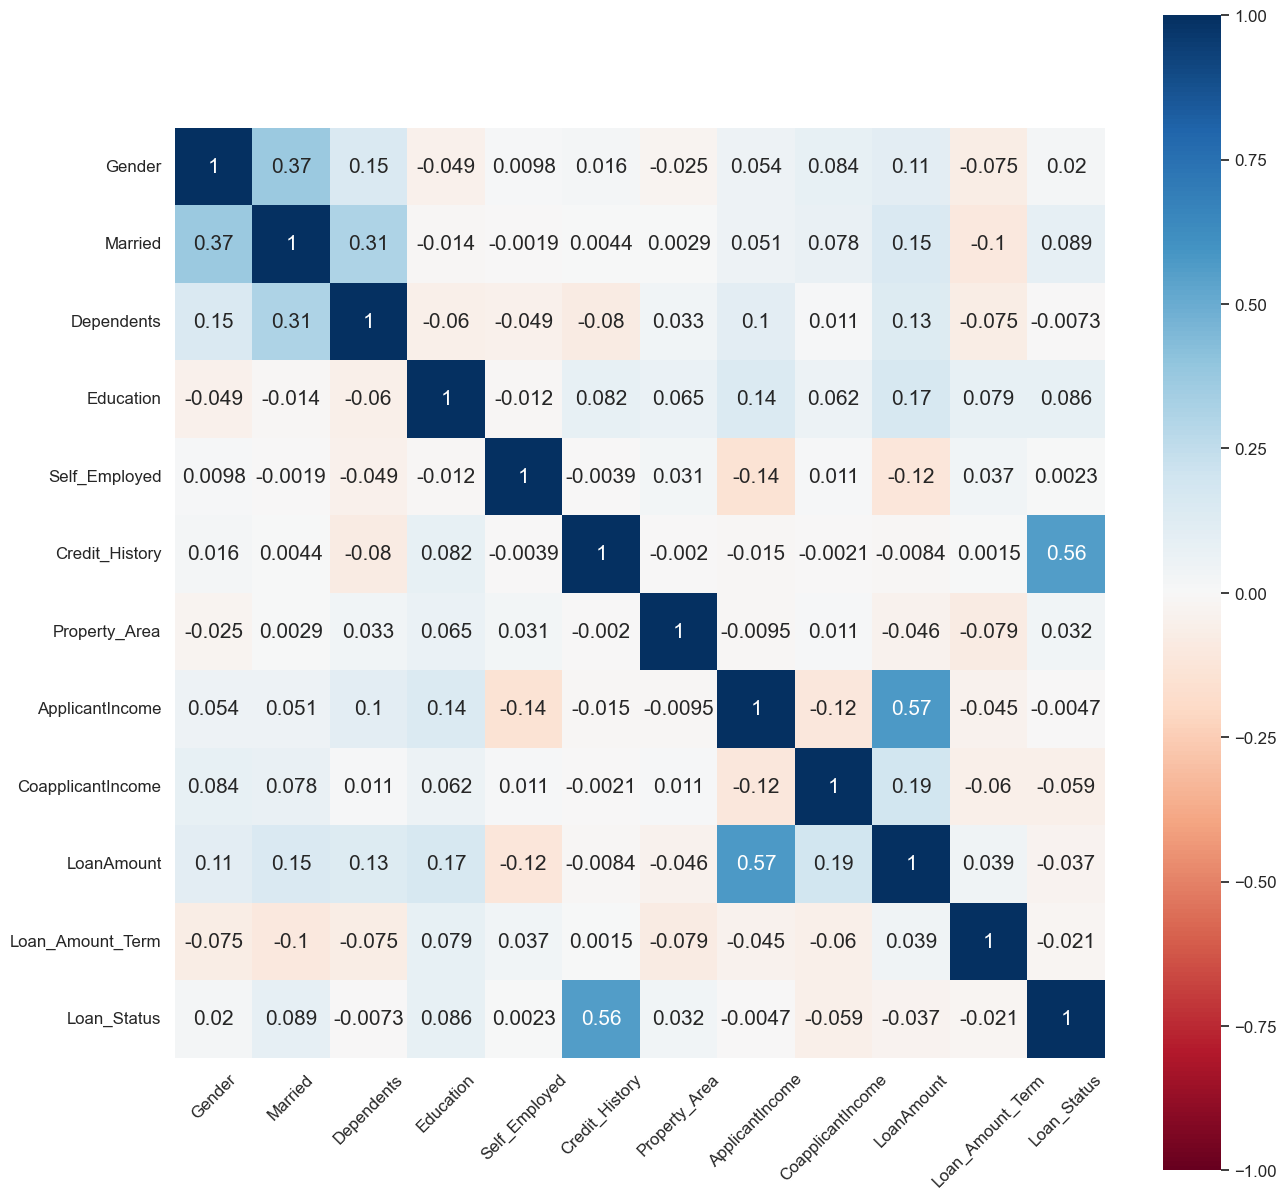

In [61]:
plt.figure(figsize=(15,15))
sb.set(font_scale=1.1)
ax = sb.heatmap(
    df[['Gender','Married','Dependents','Education','Self_Employed','Credit_History',
        'Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount',
        'Loan_Amount_Term','Loan_Status']].corr(),vmin=-1,vmax=1,center=0,cmap="RdBu",square=True,
        annot=True,annot_kws={"size":15})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='center');
plt.show